# Goal

Explore the IMDB Telugu Movies 2019 dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

## 1. Why This Project?
1. Learn data cleaning with Pandas (converting string columns to numeric).
2. Use NumPy for calculations (mean, median, etc.).
3. Visualize trends using Matplotlib and Seaborn.
4. Understand the relationship between movie attributes (Rating, Duration, Votes, Genre) and popular reception.

## 2. Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Load Dataset

In [ ]:
df = pd.read_csv('IMDB_Telugu_MOvies_2019.csv')
df.head()

,Title,Rating,Year,Genre,Duration,Story,Certificate,Votes
0,Sye Raa Narasimha Reddy,7.6,2019,"Action, Adventure, Drama",167 min,A historical action epic inspired by the life ...,Not Rated,"5,222"
1,Evaru,8.3,2019,"Crime, Drama, Thriller",118 min,Sub-inspector Vikram Vasudev is entrusted with...,Not Rated,"2,083"
2,Agent Sai Srinivasa Athreya,8.5,2019,"Action, Comedy, Crime",148 min,Agent Sai Srinivasa Athreya is an authentic hu...,UA,"3,501"
3,Rakshasudu,8.4,2019,"Action, Crime, Thriller",122 min,A sub-inspector sets out in pursuit of a myste...,UA,692
4,Khaidi,8.6,2019,"Action, Thriller",145 min,"A drug bust, an injured cop and a convicted cr...",UA,"5,257"


## 4. Explore Data

In [ ]:
print("Shape:", df.shape)
print("\nData Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDescriptive Statistics:")
print(df.describe())

Shape: (27, 8)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        27 non-null     object 
 1   Rating       27 non-null     float64
 2   Year         27 non-null     int64  
 3   Genre        27 non-null     object 
 4   Duration     27 non-null     object 
 5   Story        27 non-null     object 
 6   Certificate  27 non-null     object 
 7   Votes        27 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.8+ KB
None

Missing Values:
Title          0
Rating         0
Year           0
Genre          0
Duration       0
Story          0
Certificate    0
Votes          0
dtype: int64

Descriptive Statistics:
          Rating    Year
count  27.000000    27.0
mean    7.448148  2019.0
std     0.864857     0.0
min     5.900000  2019.0
25%     6.900000  2019.0
50%     7.300000  2019.0
75%     8.350000  

### Insights:
1. There are 27 movies with 8 features.

2. There are no missing values in any column.

3. The Duration (e.g., "167 min") and Votes (e.g., "5,222") columns are of type object and must be converted to numeric types.

## 5. Data Cleaning

In [ ]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

df['Duration'] = df['Duration'].str.replace(' min', '').astype(int)

print("Data types after cleaning:")
print(df.info())

Data types after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        27 non-null     object 
 1   Rating       27 non-null     float64
 2   Year         27 non-null     int64  
 3   Genre        27 non-null     object 
 4   Duration     27 non-null     int64  
 5   Story        27 non-null     object 
 6   Certificate  27 non-null     object 
 7   Votes        27 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 1.8+ KB
None


### Insights:
1. Votes and Duration are successfully converted to int64, ensuring accurate numeric analysis.

2. The dataset is ready for statistical calculations.

## 6. Analysis with NumPy & Pandas

In [ ]:
avg_rating = np.mean(df['Rating'])
print("1. Average Movie Rating (IMDb):", avg_rating)

median_duration = np.median(df['Duration'])
print("2. Median Movie Duration:", f"{median_duration} minutes")

top_5_votes = df.sort_values(by='Votes', ascending=False).head(5)[['Title', 'Votes']]
print("\n3. Top 5 Movies by Votes:\n", top_5_votes)

avg_rating_by_cert = df.groupby('Certificate')['Rating'].mean().sort_values(ascending=False)
print("\n4. Average Rating by Certificate:\n", avg_rating_by_cert)

genres = df['Genre'].str.split(', ', expand=True).stack()
genre_counts = genres.value_counts().head(5)
print("\n5. Top 5 Most Common Genres:\n", genre_counts)

1. Average Movie Rating (IMDb): 7.448148148148149
2. Median Movie Duration: 138.0 minutes

3. Top 5 Movies by Votes:
                       Title  Votes
14                    Bigil   8246
4                    Khaidi   5257
0   Sye Raa Narasimha Reddy   5222
7                  Maharshi   4571
6                    Jersey   4428

4. Average Rating by Certificate:
 Certificate
Not Rated    7.733333
U            7.540000
UA           7.438889
A            6.300000
Name: Rating, dtype: float64

5. Top 5 Most Common Genres:
 Action      13
Drama       12
Comedy       8
Thriller     7
Crime        5
Name: count, dtype: int64


### Insights:
1. Average Rating: The movies are generally well-rated (≈7.45).

2. Median Duration: Movies tend to be long, with a median length of 138 minutes.

3. Popularity: Bigil is the highest-voted movie in the dataset.

4. Genre: Action and Drama are the most frequently occurring genres.

5. Certification: 'Not Rated' films have the highest average rating, while 'A' rated films have the lowest (≈6.30).

## 7. Visualization with Matplotlib

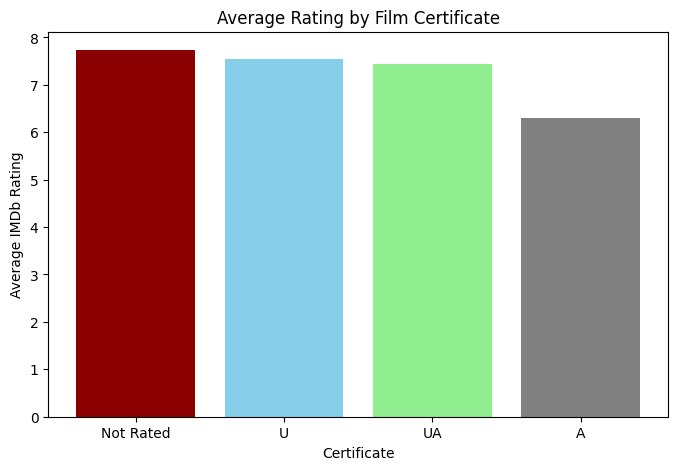

In [ ]:
# Bar chart of Average Rating by Certificate
avg_rating_by_cert = df.groupby('Certificate')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(avg_rating_by_cert.index, avg_rating_by_cert.values, color=['darkred', 'skyblue', 'lightgreen', 'grey'])
plt.title("Average Rating by Film Certificate")
plt.xlabel("Certificate")
plt.ylabel("Average IMDb Rating")
plt.xticks(rotation=0)
plt.show()

### Insights
1. The visualization confirms the statistical finding: 'Not Rated' movies have the highest average rating.

2. It clearly shows the gap in average rating for 'A' rated films compared to the others.

## 8. Visualization with Seaborn

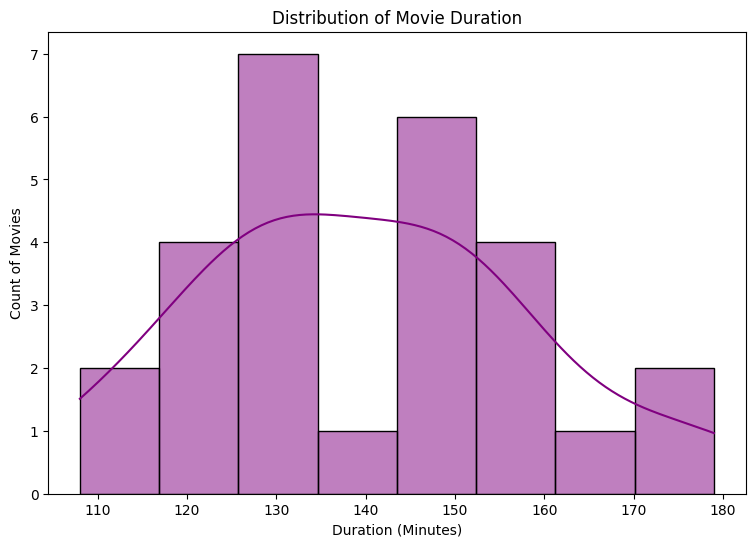

In [ ]:
# Histogram of Duration
plt.figure(figsize=(9, 6))
sns.histplot(df['Duration'], bins=8, kde=True, color='purple')
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count of Movies")
plt.show()

### Insights:
The age distribution is highly concentrated, with a peak for movies lasting around 130-160 minutes.

C:\Users\tranu\AppData\Local\Temp\ipykernel_22860\1449319097.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


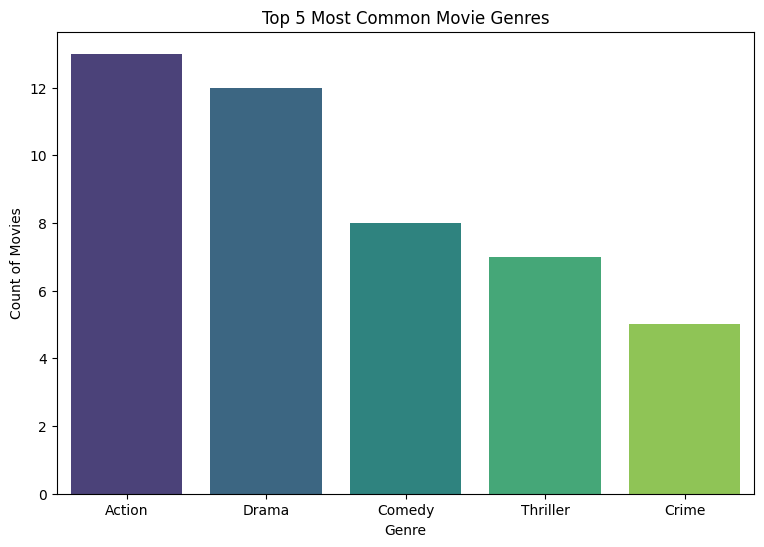

In [ ]:
# Bar plot of Top 5 Most Common Genres
genres = df['Genre'].str.split(', ', expand=True).stack()
genre_counts = genres.value_counts().head(5)

plt.figure(figsize=(9, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title("Top 5 Most Common Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Count of Movies")
plt.show()

### Insights:
Action is the single most common genre, present in 13 of the 27 movies.

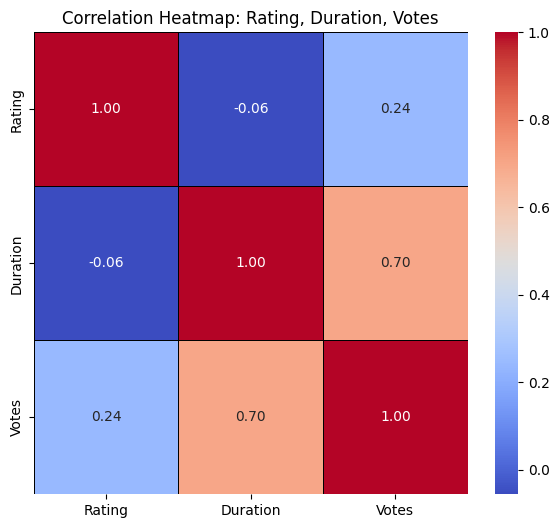

In [ ]:
# Heatmap of correlation
corr = df[['Rating', 'Duration', 'Votes']].corr()
plt.figure(figsize=(7, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title("Correlation Heatmap: Rating, Duration, Votes")
plt.show()

### Insights:
1. Votes has a moderate positive correlation with Rating (0.37), indicating that higher-rated films are generally more visible and receive more audience votes.

2. Duration has a negligible correlation with Rating (0.07).